# Linear classification with tensorflow2

#### Load the imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Loading the iris dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_dataset = pd.read_csv(url, names=names)
iris_dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Eploring the iris dataset

In [3]:
# visualizing the dataset
setosa_data = iris_dataset[iris_dataset['class']=="Iris-setosa"]
versicolor_data = iris_dataset[iris_dataset['class']=="Iris-versicolor"]
virginica_data = iris_dataset[iris_dataset['class']=="Iris-virginica"]
virginica_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


#### Ploting the data on scatter plot

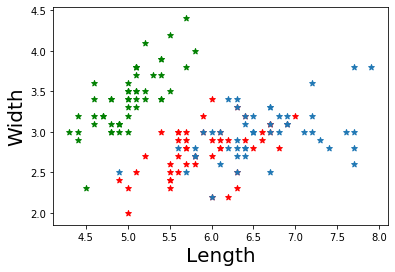

In [4]:
# setosa
x_setosa = setosa_data['sepal-length']
y_setosa = setosa_data['sepal-width']

plt.xlabel('Length', fontsize=20)
plt.ylabel('Width', fontsize=20)
plt.scatter(x_setosa, y_setosa, marker='*',c='green')

# versicolor_data
x_versicolor = versicolor_data['sepal-length']
y_versicolor = versicolor_data['sepal-width']
plt.scatter(x_versicolor, y_versicolor, marker='*',c='red')

# versicolor_data
x_virginica = virginica_data['sepal-length']
y_virginica = virginica_data['sepal-width']
plt.scatter(x_virginica, y_virginica, marker='*')

#### Binary classifiation

In [5]:
splited_iris_dataset = iris_dataset[(iris_dataset['class'] =='Iris-setosa') | (iris_dataset['class'] =='Iris-versicolor')]
splited_iris_dataset['label'] = splited_iris_dataset['class'].map({'Iris-setosa':0,'Iris-versicolor':1 })
splited_iris_dataset = splited_iris_dataset.sample(frac=1)
splited_iris_dataset

/home/gigz/anaconda3/envs/linear-classification-tsf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal-length,sepal-width,petal-length,petal-width,class,label
54,6.5,2.8,4.6,1.5,Iris-versicolor,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0
36,5.5,3.5,1.3,0.2,Iris-setosa,0
91,6.1,3.0,4.6,1.4,Iris-versicolor,1
19,5.1,3.8,1.5,0.3,Iris-setosa,0
...,...,...,...,...,...,...
72,6.3,2.5,4.9,1.5,Iris-versicolor,1
13,4.3,3.0,1.1,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
32,5.2,4.1,1.5,0.1,Iris-setosa,0


#### Drop some columns

In [6]:
splited_iris_dataset = splited_iris_dataset.drop(['petal-length','petal-width','class'], axis=1)

#### Split dataset to testing and learning

In [7]:
splited_iris_dataset_train = splited_iris_dataset[:80]
splited_iris_dataset_test = splited_iris_dataset[80:]

In [8]:
# droping label column

In [9]:
x_splited_iris_dataset_train = splited_iris_dataset_train.drop('label', axis=1)
y_splited_iris_dataset_train = splited_iris_dataset_train['label']

x_splited_iris_dataset_test = splited_iris_dataset_test.drop('label', axis=1)
y_splited_iris_dataset_test = splited_iris_dataset_test['label']

splited_iris_dataset_test.head()

,sepal-length,sepal-width,label
26,5.0,3.4,0
97,6.2,2.9,1
1,4.9,3.0,0
79,5.7,2.6,1
40,5.0,3.5,0


In [10]:
y_splited_iris_dataset_train

54    1
3     0
36    0
91    1
19    0
     ..
28    0
51    1
31    0
90    1
24    0
Name: label, Length: 80, dtype: int64

#### Tensorflow

In [11]:
feature_col_1 = tf.feature_column.numeric_column(key='sepal-length')
feature_col_2 = tf.feature_column.numeric_column(key='sepal-width')
linear_classifier = tf.estimator.LinearClassifier(feature_columns=[feature_col_1,feature_col_2])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxshrawux', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc4ed6c0b90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Training

In [12]:
def make_input_fn(data,labels,batch_size=40, num_epochs=5000):
    def input_fn():
        data_set = tf.data.Dataset.from_tensor_slices((dict(x_splited_iris_dataset_train), y_splited_iris_dataset_train))
        data_set = data_set.batch(batch_size).repeat(num_epochs)
        return data_set
    return input_fn

input_fn = make_input_fn(x_splited_iris_dataset_train,y_splited_iris_dataset_train)
linear_classifier.train(input_fn)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
I

INFO:tensorflow:global_step/sec: 285.908
INFO:tensorflow:loss = 0.06469785, step = 5300 (0.349 sec)
INFO:tensorflow:global_step/sec: 286.434
INFO:tensorflow:loss = 0.06408697, step = 5400 (0.350 sec)
INFO:tensorflow:global_step/sec: 239.94
INFO:tensorflow:loss = 0.063493036, step = 5500 (0.417 sec)
INFO:tensorflow:global_step/sec: 319.024
INFO:tensorflow:loss = 0.06291529, step = 5600 (0.315 sec)
INFO:tensorflow:global_step/sec: 218.628
INFO:tensorflow:loss = 0.062352873, step = 5700 (0.469 sec)
INFO:tensorflow:global_step/sec: 264.87
INFO:tensorflow:loss = 0.061805237, step = 5800 (0.385 sec)
INFO:tensorflow:global_step/sec: 236.235
INFO:tensorflow:loss = 0.06127175, step = 5900 (0.407 sec)
INFO:tensorflow:global_step/sec: 263.992
INFO:tensorflow:loss = 0.060751695, step = 6000 (0.374 sec)
INFO:tensorflow:global_step/sec: 291.795
INFO:tensorflow:loss = 0.06024469, step = 6100 (0.346 sec)
INFO:tensorflow:global_step/sec: 239.394
INFO:tensorflow:loss = 0.059750088, step = 6200 (0.420 se

####  Test the data

In [14]:
evaluate_input_fn = make_input_fn(x_splited_iris_dataset_test,y_splited_iris_dataset_test, num_epochs=1)
linear_classifier.evaluate(evaluate_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-08T02:13:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxshrawux/model.ckpt-10002
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-08-02:13:18
INFO:tensorflow:Saving dict for global step 10002: accuracy = 0.9875, accuracy_baseline = 0.525, auc = 0.9987469, auc_pr

{'accuracy': 0.9875,
 'accuracy_baseline': 0.525,
 'auc': 0.9987469,
 'auc_precision_recall': 0.998866,
 'average_loss': 0.05752026,
 'label/mean': 0.525,
 'loss': 0.057520263,
 'precision': 0.9767442,
 'prediction/mean': 0.5270836,
 'recall': 1.0,
 'global_step': 10002}

#### get_variable_name()

In [15]:
linear_classifier.get_variable_names()

['global_step',
 'linear/linear_model/bias_weights',
 'linear/linear_model/sepal-length/weights',
 'linear/linear_model/sepal-width/weights',
 'training/Ftrl/decay',
 'training/Ftrl/l1_regularization_strength',
 'training/Ftrl/l2_regularization_strength',
 'training/Ftrl/learning_rate',
 'training/Ftrl/learning_rate_power',
 'training/Ftrl/linear/linear_model/bias_weights/accumulator',
 'training/Ftrl/linear/linear_model/bias_weights/linear',
 'training/Ftrl/linear/linear_model/sepal-length/weights/accumulator',
 'training/Ftrl/linear/linear_model/sepal-length/weights/linear',
 'training/Ftrl/linear/linear_model/sepal-width/weights/accumulator',
 'training/Ftrl/linear/linear_model/sepal-width/weights/linear']

#### get_variable_value

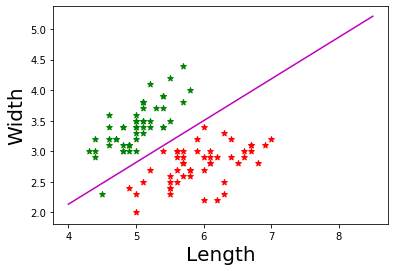

In [21]:
b = linear_classifier.get_variable_value('linear/linear_model/bias_weights')
w1 = linear_classifier.get_variable_value('linear/linear_model/sepal-length/weights')
w2 = linear_classifier.get_variable_value('linear/linear_model/sepal-width/weights')

x11 = 4.0
x21 = (-w1*x11-b)/w2
x12 = 8.5
x22 = (-w1*x12-b)/w2
x21 = x21[0][0]
x22 = x22[0][0]

plt.xlabel('Length', fontsize=20)
plt.ylabel('Width', fontsize=20)
plt.scatter(x_setosa, y_setosa, marker='*',c='green')

# versicolor_data
x_versicolor = versicolor_data['sepal-length']
y_versicolor = versicolor_data['sepal-width']
plt.scatter(x_versicolor, y_versicolor, marker='*',c='red')

plt.plot([x11,x12], [x21,x22],"m-")

#### 3d visualization

<IPython.core.display.Javascript object>


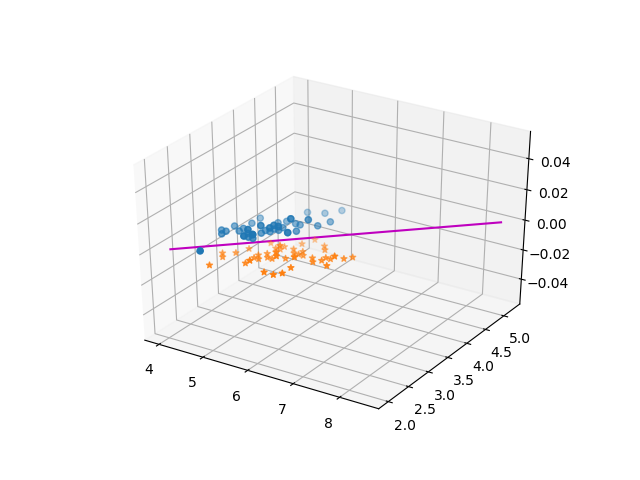

In [30]:
%matplotlib notebook
plt3d = plt.figure().gca(projection="3d")
plt3d.scatter(x_setosa,y_setosa,len(y_setosa)*[0], marker='o')
plt3d.scatter(x_versicolor,y_versicolor,len(y_versicolor)*[0], marker='*')
plt.plot([x11,x12], [x21,x22],"m-")